# **1. Characteristics of BERT**




---




BERT (Bidirectional Encoder Representations from Transformers) is one of the most influential transformer-based models in NLP.

Key Characteristics:

Bidirectional Context Understanding: Unlike earlier models that read text left-to-right (RNNs, GPT) or right-to-left, BERT reads in both directions simultaneously, giving it deep contextual understanding.

Pre-training & Fine-tuning: BERT is pre-trained on large corpora using Masked Language Modeling (MLM) and Next Sentence Prediction (NSP), then fine-tuned for specific tasks.

Transformer Encoder: Uses only the encoder stack of the Transformer architecture (multi-head self-attention + feed-forward layers).

Tokenization with WordPiece: Breaks text into subword tokens, handling rare words better than word-level tokenization.

Versatility: A single pre-trained BERT can be fine-tuned for multiple downstream NLP tasks.

# **2. Applications of BERT**



---



Question Answering (like SQuAD dataset, your project)

Text Classification (sentiment analysis, topic classification, intent detection)

Named Entity Recognition (NER)

Part-of-Speech Tagging

Text Summarization (when used as encoder in encoder-decoder setups)

Information Retrieval & Search Engines (Google uses BERT for search ranking)

Chatbots and Virtual Assistants (contextual understanding of queries)

#Question Answering with DistilBERT on Space Exploration

---



Question Answering (QA) is a core task in Natural Language Processing where a model extracts precise answers from a given text. With the rise of transformer-based models like BERT and DistilBERT, QA systems have become more accurate and efficient.

In this project, i implement a QA system using Hugging Face Transformers and apply it to a space exploration context. The goal is to understand how pretrained models can comprehend text and return meaningful answers, while also visualizing their confidence in predictions.

 # Cell 1: Install dependencies

In [2]:

!pip install -U transformers datasets matplotlib


  Using cached transformers-4.55.4-py3-none-any.whl.metadata (41 kB)
  Using cached datasets-4.0.0-py3-none-any.whl.metadata (19 kB)
  Using cached tokenizers-0.21.4-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.55.4-py3-none-any.whl (11.3 MB)
Using cached datasets-4.0.0-py3-none-any.whl (494 kB)
Using cached tokenizers-0.21.4-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.13.1
    Uninstalling datasets-2.13.1:
      Successfully uninstalled datasets-2.13.1


#  Cell 2: Imports

In [3]:
import torch
from transformers import pipeline, AutoTokenizer, AutoModelForQuestionAnswering
import matplotlib.pyplot as plt
import numpy as np

# Check versions
import transformers
print("Transformers version:", transformers.__version__)


Transformers version: 4.55.4


# Cell 3: Define Context

In [4]:
context = """
Space exploration is the ongoing discovery and exploration of celestial structures in outer space
by means of continuously evolving and growing space technology. While the study of space is carried
out mainly by astronomers with telescopes, its physical exploration is conducted both by unmanned
robotic space probes and human spaceflight. Major milestones include the first satellite Sputnik in 1957,
the first human in space Yuri Gagarin in 1961, the Apollo 11 Moon landing in 1969,
and the ongoing Mars rover missions. Future exploration includes planned human missions to Mars and
the establishment of permanent lunar bases.
"""


#  Cell 4: Load Model (DistilBERT)


In [5]:
model_name = "distilbert-base-uncased-distilled-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

qa_pipeline = pipeline("question-answering", model=model, tokenizer=tokenizer)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

Device set to use cpu


#  Cell 5: Tokenization

In [9]:
question = "Who was the first human in space?"

inputs = tokenizer(question, context, return_tensors="pt")

print("➡️ Input IDs (first 20):")
print(inputs["input_ids"][0][:20])

print("\n➡️ Tokens (first 20):")
print(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][:20]))

print("\nTotal tokens:", len(inputs["input_ids"][0]))


➡️ Input IDs (first 20):
tensor([  101,  2040,  2001,  1996,  2034,  2529,  1999,  2686,  1029,   102,
         2686,  8993,  2003,  1996,  7552,  5456,  1998,  8993,  1997, 17617])

➡️ Tokens (first 20):
['[CLS]', 'who', 'was', 'the', 'first', 'human', 'in', 'space', '?', '[SEP]', 'space', 'exploration', 'is', 'the', 'ongoing', 'discovery', 'and', 'exploration', 'of', 'celestial']

Total tokens: 121


#  Cell 6: Ask Questions

In [10]:
questions = [
    "Who was the first human in space?",
    "When was the first satellite launched?",
    "What planet has rover missions?",
    "What future plans exist for space exploration?"
]

answers = []
for q in questions:
    result = qa_pipeline(question=q, context=context)
    answers.append((q, result["answer"], result["score"]))
    print(f"Q: {q}\nA: {result['answer']} (confidence: {result['score']:.2f})\n")


Q: Who was the first human in space?
A: Yuri Gagarin (confidence: 0.99)

Q: When was the first satellite launched?
A: 1957 (confidence: 1.00)

Q: What planet has rover missions?
A: Mars (confidence: 0.96)

Q: What future plans exist for space exploration?
A: planned human missions to Mars and 
the establishment of permanent lunar bases (confidence: 0.55)



#  Cell 7: Visualize Confidence Scores

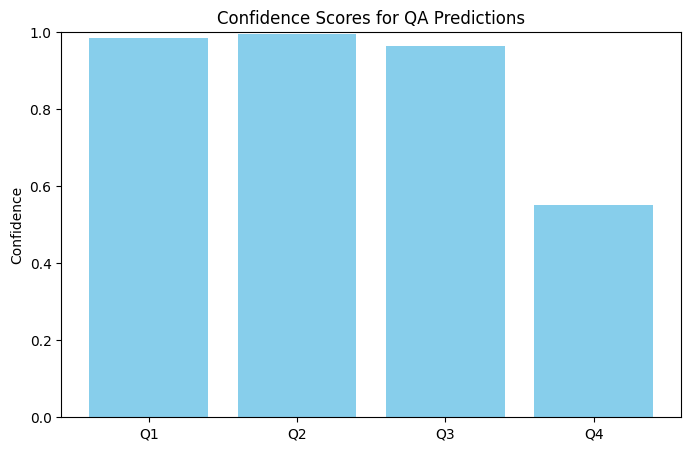

In [11]:
scores = [a[2] for a in answers]
labels = [f"Q{i+1}" for i in range(len(questions))]

plt.figure(figsize=(8,5))
plt.bar(labels, scores, color="skyblue")
plt.title("Confidence Scores for QA Predictions")
plt.ylabel("Confidence")
plt.ylim(0,1)
plt.show()


#  Cell 8: General QA Function

In [12]:
def answer_question(question, context):
    result = qa_pipeline(question=question, context=context)
    return result["answer"], result["score"]

ans, conf = answer_question("What year did Apollo 11 land on the Moon?", context)
print(f"Apollo 11 Answer: {ans} (Confidence {conf:.2f})")


Apollo 11 Answer: 1969 (Confidence 1.00)


#Summary

In this project, i built a Question Answering system using DistilBERT and applied it to a context about space exploration. The model was able to extract accurate answers and provide confidence scores, showing the effectiveness of transformer-based models for text understanding.